In [1]:
#Local Imports
from classifyhyspecmoon.neuralnetdata import NeuralNetData
from classifyhyspecmoon.buildNN import run_mlp,MyHyperParameters

Thank you for using ClassifyHySpecMoon by z-vig!



In [2]:
#Remote Imports
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.font_manager as fnt_mang
import numpy as np
from matplotlib.colors import ListedColormap

Loaded in data of shape: (239, 584, 408)
Reminder: (bands,ydimension,xdimension)


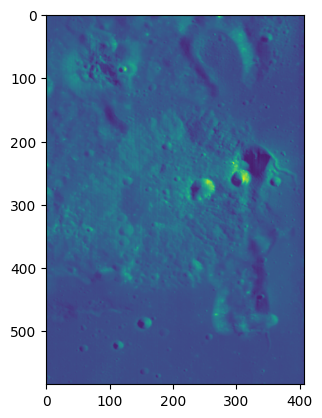

In [3]:
#Getting Raw Spectral Data
mydata = NeuralNetData('C:/Users/zvig/.julia/dev/JENVI.jl/Data/targeted.hdf5')
print(f'Loaded in data of shape: {mydata.smoothspec.shape}')
print(f'Reminder: (bands,ydimension,xdimension)')
plt.imshow(mydata.smoothspec[1,:,:])

(584, 408)


c:\Users\zvig\Desktop\python_code\ClassifyHySpecMoon\classifyhyspecmoon\create_labels.py:23: RuntimeWarning: invalid value encountered in arccos
  spa = 180*np.arccos(np.einsum('ijk,ijk->ij',M,I)/(np.linalg.norm(M,axis=2)*np.linalg.norm(I,axis=2)))/np.pi


6


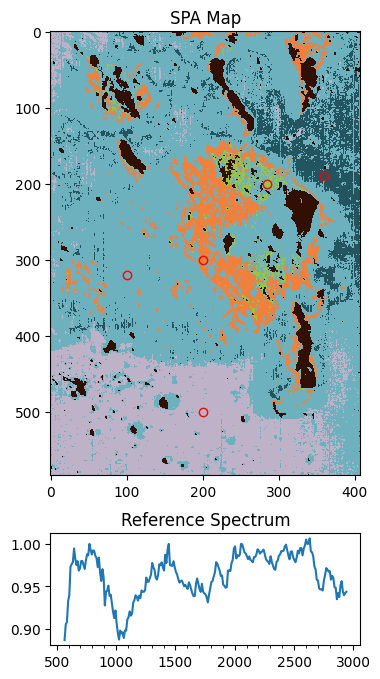

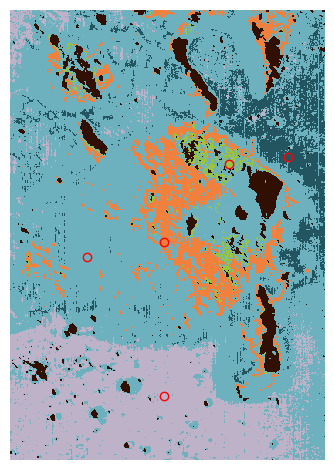

In [4]:
#Creating data labels for neural net validation
olpt = (200,284)
refspec1 = mydata.smoothspec[:,*olpt] #olivine
olcheck = mydata.contrem[:,*olpt]
refspec2 = mydata.smoothspec[:,500,200] #mare (South)
refspec3 = mydata.smoothspec[:,190,360] #mare (North)
refspec4 = mydata.smoothspec[:,300,200] #dome center
refspec5 = mydata.smoothspec[:,320,100] #dome flank
refspec_raw = mydata.rawspec[:,200,280]
refspec_dict = {'Olivine':(refspec1,1.2),'Mare1':(refspec2,1),'Mare2':(refspec3,0.7),'Dome1':(refspec4,1),'Dome2':(refspec5,1)} #Dictionary of tuples {str:(array,threshold)}
mydata.label_data('Spectral_Angle',refspec_dict)

fig,[ax11,ax12] = plt.subplots(2,1,height_ratios=[4,1],figsize=(4,8))
c = ListedColormap(['#310f02','#9BC53D','#BEB2C8','#225560','#F0803C','#6DB1BF'])
ax11.imshow(mydata.labeled_data,interpolation='none',cmap=c)
ax11.set_title('SPA Map')
# ax12.plot(refspec1)
# ax12.plot(refspec_raw)
ax12.plot(mydata.wvl,olcheck)
ref_pts = [(olpt[1],olpt[0]),(200,500),(360,190),(200,300),(100,320)]
for i in range(0,len(ref_pts)):
    ax11.scatter(*ref_pts[i],color = c(i+1),edgecolors='red')
ax12.set_title('Reference Spectrum')
ax12.xaxis.set_minor_locator(ticker.MultipleLocator(100))
# plt.savefig('G:/Shared drives/Zach Lunar-VISE/Abstracts/NESF_2024/Figures/similarity_map',dpi=300)

fig2,ax2 = plt.subplots(1,layout='tight')
ax2.imshow(mydata.labeled_data,interpolation='none',cmap=c)
ax2.axis('off')
for i in range(0,len(ref_pts)):
    ax2.scatter(*ref_pts[i],color = c(i+1),edgecolors='red')
plt.savefig('G:/Shared drives/Zach Lunar-VISE/Abstracts/NESF_2024/Figures/tight_sim.png',bbox_inches='tight',dpi=500)
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

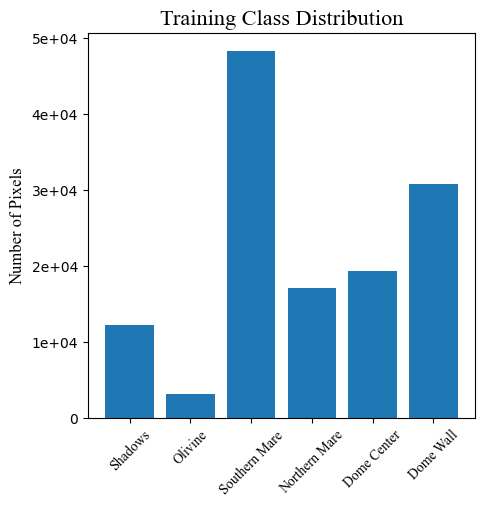

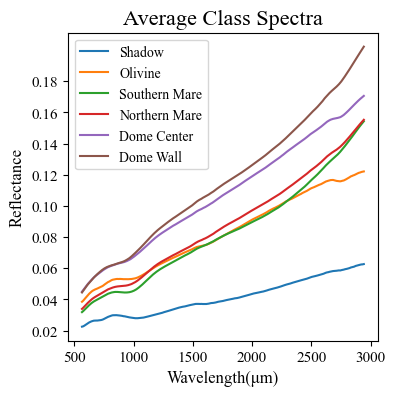

In [20]:
#Visualing binary labels
shadows = mydata.smoothspec[:,mydata.labeled_data==0]
olivine = mydata.smoothspec[:,mydata.labeled_data==1]
mareS = mydata.smoothspec[:,mydata.labeled_data==2]
mareN = mydata.smoothspec[:,mydata.labeled_data==3]
domeC = mydata.smoothspec[:,mydata.labeled_data==4]
domeF = mydata.smoothspec[:,mydata.labeled_data==5]


nshad = shadows.shape[1]
nol = olivine.shape[1]
nmarS = mareS.shape[1]
nmarN = mareN.shape[1]
ndomeC = domeC.shape[1]
ndomeF = domeF.shape[1]

fancyfont = {'fontname':'Times New Roman'}
font = fnt_mang.FontProperties(family='Times New Roman',style='normal',size=10)

fig1,ax1 = plt.subplots(1,1,figsize=(5,5))
ax1.bar([1,2,3,4,5,6],[nshad,nol,nmarS,nmarN,ndomeC,ndomeF])
ax1.set_xticks([1,2,3,4,5,6],['Shadows','Olivine','Southern Mare','Northern Mare','Dome Center','Dome Wall'],rotation=45,**fancyfont,fontsize=10)
ax1.set_title('Training Class Distribution',**fancyfont,fontsize=16)
ax1.set_ylabel('Number of Pixels',**fancyfont,fontsize=12)
# ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2g}'))

fig2,ax21 = plt.subplots(1,1,figsize=(4,4))
ax21.plot(mydata.wvl,np.mean(shadows,axis=1),label='Shadow')
ax21.plot(mydata.wvl,np.mean(olivine,axis=1),label='Olivine')
ax21.plot(mydata.wvl,np.mean(mareS,axis=1),label='Southern Mare')
ax21.plot(mydata.wvl,np.mean(mareN,axis=1),label='Northern Mare')
ax21.plot(mydata.wvl,np.mean(domeC,axis=1),label='Dome Center')
ax21.plot(mydata.wvl,np.mean(domeF,axis=1),label='Dome Wall')
ax21.legend(prop=font)

ax21.set_xlabel('Wavelength(\u03bcm)',**fancyfont,fontsize=12)
ax21.set_ylabel('Reflectance',**fancyfont,fontsize=12)
ax21.set_title('Average Class Spectra',**fancyfont,fontsize=16)
ax21.set_xticks(np.arange(500,3500,500),labels=np.arange(500,3500,500),**fancyfont,fontsize=11)
ax21.set_yticks(np.arange(0.02,0.2,0.02),labels=np.arange(0.02,0.2,0.02),**fancyfont,fontsize=11)
ax21.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
# plt.savefig('G:/My Drive/Machine Learning Project/Figures/class_distribution.svg',transparent=True,bbox_inches='tight',pad_inches=2)
plt.savefig('G:/My Drive/Machine Learning Project/Figures/class_averages.svg',transparent=True,bbox_inches='tight',pad_inches=1)

In [6]:
hyperparams = MyHyperParameters(10,[10]*10,0.01,1000,20)

mydata.split_train_test()
mydata.minmax_normalization((0,1))

model,hist,pred = run_mlp(mydata,hyperparams)


Epoch 1/20

161/161 [==============================] - 1s 2ms/step - loss: 3.8176 - val_loss: 3.0392
Epoch 2/20
161/161 [==============================] - 0s 2ms/step - loss: 2.8921 - val_loss: 3.1121
Epoch 3/20
161/161 [==============================] - 0s 1ms/step - loss: 2.7297 - val_loss: 2.7119
Epoch 4/20
161/161 [==============================] - 0s 1ms/step - loss: 2.5801 - val_loss: 2.5822
Epoch 5/20
161/161 [==============================] - 0s 1ms/step - loss: 2.5206 - val_loss: 2.5014
Epoch 6/20
161/161 [==============================] - 0s 1ms/step - loss: 2.4603 - val_loss: 2.8094
Epoch 7/20
161/161 [==============================] - 0s 1ms/step - loss: 2.4335 - val_loss: 2.4622
Epoch 8/20
161/161 [==============================] - 0s 1ms/step - loss: 2.3782 - val_loss: 2.2275
Epoch 9/20
161/161 [==============================] - 0s 1ms/step - loss: 2.3335 - val_loss: 2.3481
Epoch 10/20
161/161 [==============================] - 0s 1ms/step - loss: 2.3314 - val_loss: 2.31

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                2400      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

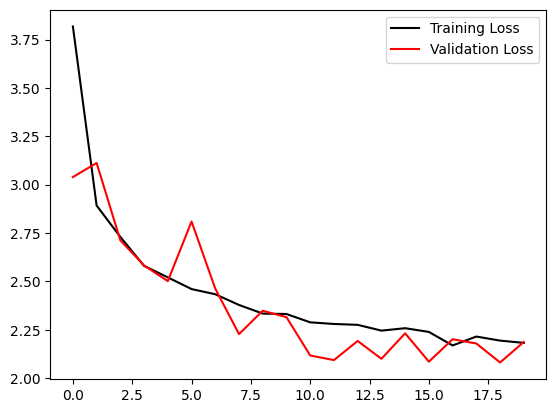

In [7]:
model.summary()

# print(mydata.Y_train)

plt.plot(range(0,hyperparams.nepochs),hist.history['loss'],c='k',label='Training Loss')
plt.plot(range(0,hyperparams.nepochs),hist.history['val_loss'],c='r',label='Validation Loss')
plt.legend()
# plt.ylim(0,0.5)

(59568,)
(59568, 1)
<class 'numpy.ndarray'>
[[4.]
 [5.]
 [5.]
 [3.]
 [5.]
 [5.]
 [3.]
 [5.]
 [3.]
 [0.]
 [5.]
 [4.]
 [5.]
 [5.]
 [0.]
 [5.]
 [5.]
 [5.]
 [4.]]


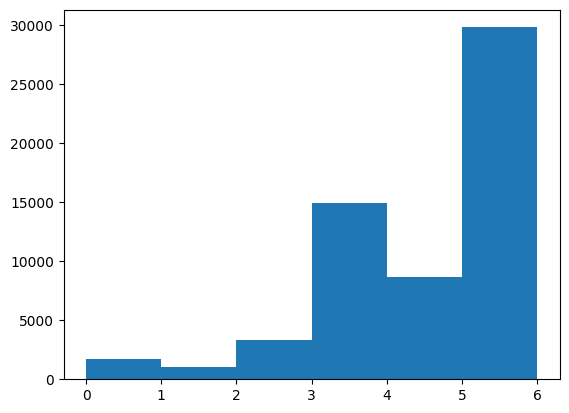

In [16]:
print(mydata.Y_test.shape)
print(pred.shape)
print(type(pred))
pred = np.around(pred,0)
print(pred[1:20,:])
h = plt.hist(pred,bins=6)